<a href="https://colab.research.google.com/github/Ongeri-Ongeri/SENTIMENT-ANALYSIS-OF-KENYAN-BANK-CHARGES-USING-TWITTER-DATA/blob/main/Final_Copy_of_Sentiment_Analysis_of_Kenyan_bank_charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SENTIMENT ANALYSIS OF KENYAN BANK CHARGES USING TWITTER DATA**
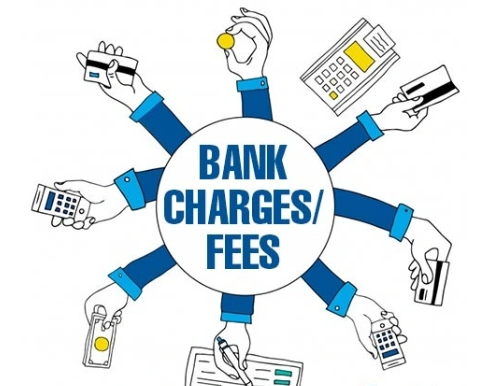

# 1).Project Overview
A bank is a financial institution that is licensed to accept checking and savings deposits and give loans. Banks also provide related services such as individual retirement accounts (IRAs), certificates of deposit (CDs), currency exchange and safe deposit boxes. Kenyan banks are regulated by Central Bank of Kenya. One of the ways that they make profit is through charging fees for the various products and services that they offer. We want to analyze what customers feel about the different bank charges and fees based on the comments and feedback on Twitter.

# Problem Statement
Pricing is currently more relevant for banks than ever before. Prices play a central role for customer satisfaction and profitability. Especially in the current situation, marked by cost pressure and changing customer expectations, pricing is thus of particular importance. It presents banks with challenges but at the same time opportunities. At the begining of the year, there has been a discussion on social media platforms regarding the different bank charges.

It is on this basis that our area of interest is to establish and create a model that analyzes the sentiments of customers on the same and guide banks accordingly so as to make informed decisions.

We will achieve this by categorizing the sentiments into high, fair and low.




# Objectives
# a) Main Objective
To create a model that analyzes and categorizes the sentiments of customers on Twitter regarding the different bank charges.

# b)Specific Objective
1.  To establish what customers feel about the charges.
2.  To establish the bank that is highly mentioned during charges discussions.
3.   To establish the most frequently used words by customers to express their sentiments regarding the charges.




# Specifying the question


1. What do customers feel about the charges?
2. Which bank is highly mentioned during charges discussions?
3. Which are the most frequently used words by customers to express their sentiments regarding the charges?



# Defining Metric of Success
Project will be considered successful if we manage to analyze and categorize sentiments of customers on Twitter regarding the different bank charges and achieve an accuracy and precision score of 80%.

# Understanding the question
Our data will be extracted from twitter via web scraping. The following key words will be used; MPESA, #M-PESA, #FEE, #Charges, MOBILE_WALLET, #Free,#KCBmpesa,Paybill, #Cbk, #Resumption, #CBK, #Reintroduced, #Mobile-charges, #Safaricom and Transfer.

# Recording the experimental design
1. Extraction of the right data from Twitter using web scraping.
2. Importing the necessary libraries for data analysis.
3. Data Preparation.
4. Exploratory data analysis.
5. Data pre-processing.
6. Modelling.
7. Project outcomes and conclusion.

# Data Relevance
The data is relevant to our study as we extracted it from Twitter via web scraping using the keywords frequently used by banks and customers.

# 2).Data Extraction

In [ ]:
pip install git+https://github.com/tweepy/tweepy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-2w24rfih
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /tmp/pip-req-build-2w24rfih
  Resolved https://github.com/tweepy/tweepy.git to commit 5d22a01a2f48feaed6817e0ab7c27a990735a3d8
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.7 MB/s eta 0:00:00
  Created wheel for tweepy: filename=tweepy-4.12.1-py3-none-any.whl size=102528 sha256=cefbc81654e7011cef26d19dbcfaaccc550b3ceb2aef0fccb1aa1182e76af002
  Stored in directory: /tmp/pip-ephem-wheel-cache-n6k89n99/wheels/ad/05/51/a78f66d15b87f9c623d2f3afc4401660ac4219e526c787fb8b
Successfully built tweepy
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uni

In [ ]:
pip install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-fkspgsml
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-fkspgsml
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit f329b69ed4022c4e8af5be8a07d4f5a4125bd8d9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for UNKNOWN: filename=UNKNOWN-0.5.0.20230114.dev31+gf329b69-py3-none-any.whl size=13563 sha256=0607a1ecc9b1b555b4343fc7e88dc0634f39607913a0cdd415bc45be767d32bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-le3ev1ak/wheels/92/42/87/33fa9b18f7a75d02643a9ca3743339aec9be28c6796267c7d8
Successfully built UNKNOWN


In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 2.6 MB/s eta 0:00:00


In [ ]:
#libraries needed
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#webscrapping
query = "(MPESA OR #M-PESA OR #FEE OR #Charges OR MOBILE_WALLET OR #Free OR #KCBmpesa OR Co-op OR Equity Bank OR Paybill OR #Cbk OR #Resumption OR #CBK OR #Reintroduced OR #Mobile-charges OR #Safaricom OR Transfer) since:2020-01-01 until:2023-02-13"
tweets = []
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i>30000:
        break
    else:
        tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])
df = pd.DataFrame(tweets, columns = ['Date', 'ID', 'url', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
df.to_csv('sentiment.csv', mode = 'a')

<ipython-input-5-df535dbdd1d2>:8: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])


# 3).Reading data

In [ ]:
#Loading data and previewing the top of our dataset
df =  pd.read_csv('sentiment.csv', encoding = 'unicode_escape')
df.head(10)

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet
0,0,2023-02-12 23:59:59+00:00,1624921289558495232,https://twitter.com/natlr/status/1624921289558...,natlr,Twitter for iPhone,new zealand,@jeffcthomson @indie_pixel The community of fa...,2,0
1,1,2023-02-12 23:59:58+00:00,1624921283174473728,https://twitter.com/Jason144freedom/status/162...,Jason144freedom,Twitter for iPhone,NaN,@NKinNewEng Masks do not prevent viral transfe...,0,0
2,2,2023-02-12 23:59:56+00:00,1624921276807581696,https://twitter.com/JamesHe38492294/status/162...,JamesHe38492294,Twitter for iPhone,"DE and Mass, USA",@PatPetterson2 Buttigiegâs diversity inclusi...,0,0
3,3,2023-02-12 23:59:52+00:00,1624921259245969409,https://twitter.com/ILSchoolNet/status/1624921...,ILSchoolNet,IFTTT,Illinois,Batavia school board candidates discuss equity...,0,0
4,4,2023-02-12 23:59:50+00:00,1624921249276370944,https://twitter.com/carrelshoppe/status/162492...,carrelshoppe,Twitter for iPhone,NaN,Facebook page for sale !\nâ±130 \n\ninformati...,0,0
5,5,2023-02-12 23:59:39+00:00,1624921203868590083,https://twitter.com/Vgtorious/status/162492120...,Vgtorious,Twitter for Android,NaN,@FinPlanKaluAja1 This cashless policy is worst...,1,0
6,6,2023-02-12 23:59:27+00:00,1624921154719739907,https://twitter.com/GSUCampusLiving/status/162...,GSUCampusLiving,Twitter for iPhone,"Grambling, LA",#Gramfam27 we are ONE day away from the openin...,3,0
7,7,2023-02-12 23:59:15+00:00,1624921105361260545,https://twitter.com/awakeningvet/status/162492...,awakeningvet,Twitter for iPhone,"Indiana, USA",In 48 hours Iâve had 850 ml removed from my...,0,0
8,8,2023-02-12 23:59:12+00:00,1624921091146932226,https://twitter.com/MountainMamaNow/status/162...,MountainMamaNow,Twitter Web App,"Colorado, USA",Compel Release Giveaway https://t.co/6O0M61cal...,0,0
9,9,2023-02-12 23:59:10+00:00,1624921081508253697,https://twitter.com/lilred0515/status/16249210...,lilred0515,Royal Draw,"Kingsport, TN",WIN a $50 Lowe's Gift Card @RoyalDraw https://...,0,0


In [ ]:
#Previewing the bottom of our dataset
df.tail(10)

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet
29991,29991,2023-02-11 19:00:36+00:00,1624483559686692866,https://twitter.com/JGGolfFitness/status/16244...,JGGolfFitness,Twitter for iPhone,"Northampton, England",3 - Practice swinging fast! ð£ \n\nEvery gol...,9,0
29992,29992,2023-02-11 19:00:35+00:00,1624483553336766464,https://twitter.com/aifxtrader/status/16244835...,aifxtrader,BOT3 sign,NaN,BOTã®ç¾è³ç£(equity)ï¼1433.12 (43.3%)\né ...,0,0
29993,29993,2023-02-11 19:00:34+00:00,1624483552132837378,https://twitter.com/MrsSidneyEdu/status/162448...,MrsSidneyEdu,Twitter for iPhone,"Angleton, TX",I'm excited to attend The Relevance of Explici...,4,1
29994,29994,2023-02-11 19:00:29+00:00,1624483529475203074,https://twitter.com/GoodmanHoops/status/162448...,GoodmanHoops,Twitter for iPhone,"ÃT: 41.51667,-70.661023",NC State with a 30-point road win at Conte For...,129,9
29995,29995,2023-02-11 19:00:26+00:00,1624483515214569472,https://twitter.com/JurassicApps/status/162448...,JurassicApps,Buffer,United Kingdom,Dinosaur Assassin: Online Evolution - Mac Vers...,0,0
29996,29996,2023-02-11 19:00:25+00:00,1624483513620914176,https://twitter.com/Equity_Allies/status/16244...,Equity_Allies,Twitter for Android,United States,https://t.co/yBbKFY7XoL,0,0
29997,29997,2023-02-11 19:00:22+00:00,1624483498529619969,https://twitter.com/scolyke/status/16244834985...,scolyke,Twitter for iPhone,"Houston, TX",@ZBankEnt Thatâs understandable. I donât m...,0,0
29998,29998,2023-02-11 19:00:22+00:00,1624483498152034305,https://twitter.com/roma_tifa_roma/status/1624...,roma_tifa_roma,Twitter for Android,"ÅÃ³dzkie, Polska",Solbaken... Od pierwszej plotki wyÅmiewalem t...,0,0
29999,29999,2023-02-11 19:00:19+00:00,1624483488635265024,https://twitter.com/JuriSprudence63/status/162...,JuriSprudence63,Twitter for Android,NaN,"@DrMatthewSweet @thecoastguy @GBNEWS Boo hoo, ...",0,0
30000,30000,2023-02-11 19:00:15+00:00,1624483470037684224,https://twitter.com/DrDeathCultClub/status/162...,DrDeathCultClub,Twitter Web App,Digital Spirit,NFT marketplaces are the backbone of the ecosy...,30,14


In [ ]:
#Checking the shape of our dataset
df.shape

(30001, 10)

In [ ]:
#Checking for unique values
df.nunique()

Unnamed: 0        30001
Date              25637
ID                30001
url               30001
username          22993
source              559
location           7931
tweet             29485
num_of_likes        335
num_of_retweet      154
dtype: int64

In [ ]:
#Checking data types
df.dtypes

Unnamed: 0         int64
Date              object
ID                 int64
url               object
username          object
source            object
location          object
tweet             object
num_of_likes       int64
num_of_retweet     int64
dtype: object

In [ ]:
#Checking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30001 non-null  int64 
 1   Date            30001 non-null  object
 2   ID              30001 non-null  int64 
 3   url             30001 non-null  object
 4   username        30001 non-null  object
 5   source          30001 non-null  object
 6   location        17960 non-null  object
 7   tweet           30001 non-null  object
 8   num_of_likes    30001 non-null  int64 
 9   num_of_retweet  30001 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.3+ MB


# 4).Tidying our dataset

In [ ]:
#check column titles
df.columns

Index(['Unnamed: 0', 'Date', 'ID', 'url', 'username', 'source', 'location',
       'tweet', 'num_of_likes', 'num_of_retweet'],
      dtype='object')

In [ ]:
#Drop unneccessary columns
#We choose to drop the column Unnamed, ID, URL, Username, Source, location
#and remain with columns that will be relevant for our analysis
df.drop(['Unnamed: 0', 'ID', 'url','username', 'source', 'location' ], axis=1, inplace=True)

In [ ]:
df.head()

,Date,tweet,num_of_likes,num_of_retweet
0,2023-02-12 23:59:59+00:00,@jeffcthomson @indie_pixel The community of fa...,2,0
1,2023-02-12 23:59:58+00:00,@NKinNewEng Masks do not prevent viral transfe...,0,0
2,2023-02-12 23:59:56+00:00,@PatPetterson2 Buttigiegâs diversity inclusi...,0,0
3,2023-02-12 23:59:52+00:00,Batavia school board candidates discuss equity...,0,0
4,2023-02-12 23:59:50+00:00,Facebook page for sale !\nâ±130 \n\ninformati...,0,0


In [ ]:
#Checking for missing values
df.isnull().sum()

Date              0
tweet             0
num_of_likes      0
num_of_retweet    0
dtype: int64

We have noted that we do not have missing values.

In [ ]:
#Checking for duplicates
df.duplicated().sum()

2

We do have two duplicated records. We choose to drop them.

In [ ]:
#Dropping the duplicated record
df=df.drop_duplicates()
#Checking if the duplicates have been dropped
df.duplicated().sum()

0

# 5). Data preprocessing

We will remove the stop words, tags, url links and other unnecessary words.

In [ ]:
#clean tweets
#Glance at data
df['tweet'][:20]

0     @jeffcthomson @indie_pixel The community of fa...
1     @NKinNewEng Masks do not prevent viral transfe...
2     @PatPetterson2 Buttigiegâs diversity inclusi...
3     Batavia school board candidates discuss equity...
4     Facebook page for sale !\nâ±130 \n\ninformati...
5     @FinPlanKaluAja1 This cashless policy is worst...
6     #Gramfam27 we are ONE day away from the openin...
7     In 48 hours Iâve had 850 ml  removed from my...
8     Compel Release Giveaway https://t.co/6O0M61cal...
9     WIN a $50 Lowe's Gift Card @RoyalDraw https://...
10    @cuethelibrarian @getyourdorkon @NCSLMA @teach...
11    we shot ourselves in the foot massivelyâ¦ tha...
12    @antifragilebtc @alandeane @realBobbyHealy @Ul...
13    CHINA IS PREPARING FOR WAR AND WEâRE PLAYING...
14    @SplashteamDevs @trump2Prisonnow I was also tr...
15    @JudiciaryGOP Stop with your phony patriotism....
16    could someone send $1 at least ;3; a $12 payme...
17    if I could transfer my weekday discipline 

Defining the cleaning function to remove specified elements from the tweet message

In [ ]:
#Define a function

import re
import tweepy
from textblob import TextBlob

def text_cleaning(tweet):
  
    tweet = tweet.lower()                           #Lowercase
    tweet = re.sub(r'http\S+|www\.\S+|https\S+', '', tweet, flags=re.MULTILINE) #Removing the hyperlink/urls
    tweet = re.sub(r'\@\w+|\#','', tweet)     # removing @mentions and #
    tweet = re.sub(r'rt[\s]+', '', tweet)           # removing RT
    tweet = re.sub(r'&[a-z;]+', '', tweet)          # removing '&gt;'
    sntwitter.TweetRef = re.sub('[^a-zA-Z]', ' ', tweet)         #removing punctuation

    return tweet

Applying cleaning function and previewing changes

In [ ]:
# applying the text cleaning function on tweets
df = df[df['tweet'].notna()]
df['tweet'] = df['tweet'].apply(text_cleaning)
df.head(100)

,Date,tweet,num_of_likes,num_of_retweet
0,2023-02-12 23:59:59+00:00,the community of families fund the school. ...,2,0
1,2023-02-12 23:59:58+00:00,"masks do not prevent viral transfer, literall...",0,0
2,2023-02-12 23:59:56+00:00,buttigiegâs diversity inclusion and equity ...,0,0
3,2023-02-12 23:59:52+00:00,batavia school board candidates discuss equity...,0,0
4,2023-02-12 23:59:50+00:00,facebook page for sale !\nâ±130 \n\ninformati...,0,0
...,...,...,...,...
95,2023-02-12 23:51:36+00:00,fuck equity!!,1,0
96,2023-02-12 23:51:30+00:00,whatâs the catalyst for change in approach?...,0,0
97,2023-02-12 23:51:30+00:00,"""the private equity industry is constantly evo...",1,1
98,2023-02-12 23:51:18+00:00,wow runway has the best video style transf...,1,0


In [ ]:
#import libraries
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet

Downloading requisite packages for the nltk library.

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
eng_stop_words = list(stopwords.words('english'))

In [ ]:
#Dealing with emojis
import re

In [ ]:
pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 2.2 MB/s eta 0:00:00


In [ ]:
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

In [ ]:
emoji = list(UNICODE_EMOJI.keys())

In [ ]:
# function for preprocessing tweet in preparation for sentiment analysis
def ProcessedTweets(text):
    #changing tweet text to small letters
    # text = text.lower()
    # Removing @ and links 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    # removing punctuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    # lemmetizing words
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text

In [ ]:
# Generate a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.
df['Processed_Tweets'] = df['tweet'].apply(ProcessedTweets) #same as lemmatizer function
df.head()

,Date,tweet,num_of_likes,num_of_retweet,Processed_Tweets
0,2023-02-12 23:59:59+00:00,the community of families fund the school. ...,2,0,community family fund school auckland grammar ...
1,2023-02-12 23:59:58+00:00,"masks do not prevent viral transfer, literall...",0,0,mask prevent viral transfer literally say ever...
2,2023-02-12 23:59:56+00:00,buttigiegâs diversity inclusion and equity ...,0,0,buttigiegâs diversity inclusion equity real ...
3,2023-02-12 23:59:52+00:00,batavia school board candidates discuss equity...,0,0,batavia school board candidate discus equity s...
4,2023-02-12 23:59:50+00:00,facebook page for sale !\nâ±130 \n\ninformati...,0,0,facebook page sale â± information â k like f...


## Sentiment Analysis
To carry this out the polarity score is gotten using the TextBlob library which is usually used for NLP processes. The polarity score tells the level of how good or bad the words used in the tweet are. After the polarity is gotten a condition is set to get the sentiments.

In [ ]:
# Function for polarity score
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity > 0:
        return "High"
    elif polarity == 0:
        return "Fair"
    else:
        return "Low" 

In [ ]:
# using the functions to get the polarity and sentiment
df['Polarity'] = df['Processed_Tweets'].apply(polarity)
df['Sentiment'] = df['Polarity'].apply(sentimenttextblob)
sent = df['Sentiment'].value_counts()
sent

High    13414
Fair    11767
Low      4818
Name: Sentiment, dtype: int64

# 6). Exploratory Data Analysis

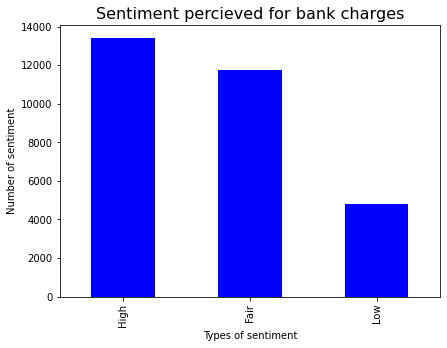

In [ ]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent.plot(kind='bar', color=['blue'], figsize=(15,5))
plt.title('Sentiment percieved for bank charges', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

According to this bar graph, a high number of customers feel that the charges are high.

In [ ]:
#another data wrangling process
# convert the tweet text into a string separate with " "
tweets_string = df['Processed_Tweets'].tolist()
tweets_string = " ".join(tweets_string)

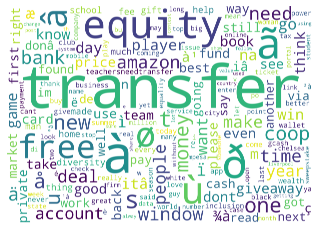

In [ ]:
# Displaying the most talked about word in a word cloud 
# Instantiate the Twitter word cloud object
w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'white', width = 7000, height = 5000).generate(tweets_string)
# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Observation: Most used words are Equity, transfer and Free are mostly used words. 

# 7). Data Modelling

We will use XGBoost model to implement our solution.

In [ ]:
#Create a new data frame with the variables that we will use for modelling.
df1=df[['Processed_Tweets','Sentiment']]

In [ ]:
#Encoding sentiments
# Import label encoder so as to encode sentiment variable
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df1['Sentiment']= label_encoder.fit_transform(df1['Sentiment']) 
print(df1.head())

                                    Processed_Tweets  Sentiment
0  community family fund school auckland grammar ...          0
1  mask prevent viral transfer literally say ever...          0
2  buttigiegâs diversity inclusion equity real ...          1
3  batavia school board candidate discus equity s...          2
4  facebook page sale â± information â k like f...          1


<ipython-input-38-7e9b2ea2577f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment']= label_encoder.fit_transform(df1['Sentiment'])


In [ ]:
# splitting the data into training and testing data

X= df1['Processed_Tweets'].values
y= df1['Sentiment'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize tweets for model building
vectorizer = CountVectorizer(binary=False,stop_words='english')

# Fit the training data and then return the matrix
X_train_vec = vectorizer.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
X_test_vec = vectorizer.transform(X_test)

In [ ]:
import xgboost as xgb

# Convert inputs to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_vec, label=y_train)
dtest = xgb.DMatrix(X_test_vec, label=y_test)

# Define XGBoost model parameters
params = {'objective': 'multi:softmax', 'num_class': 3, 'max_depth': 6,
          'eta': 0.3, 'subsample': 0.6, 'colsample_bytree': 0.8}

# Train the XGBoost model
num_rounds = 50
xgb_model = xgb.train(params, dtrain, num_rounds)

# Use the XGBoost model to make predictions on the test set
xgb_pred = xgb_model.predict(dtest)

# Evaluate the performance
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix = confusion_matrix(y_test, xgb_pred)
print(confusion_matrix)
print('--------------------------------------------------------------------------')
print(classification_report(y_test, xgb_pred))

[[3544   56    9]
 [ 741 3107  101]
 [ 466  238  738]]
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      3609
           1       0.91      0.79      0.85      3949
           2       0.87      0.51      0.64      1442

    accuracy                           0.82      9000
   macro avg       0.84      0.76      0.78      9000
weighted avg       0.84      0.82      0.81      9000



Our precision score is 75%, recall score is 98%, F1-score is 85% and accuracy is 82%. We will carry out hyperparameter tuning to try and improve the performance of our model.

## Hyperparamater tuning

We will try to improve our model performance by changing max_depth to 20.

In [ ]:
# Define XGBoost model parameters
params = {'objective': 'multi:softmax', 'num_class': 3, 'max_depth': 20,
          'eta': 0.3, 'subsample': 0.6, 'colsample_bytree': 0.8}

# Train the XGBoost model
num_rounds = 50
xgb_model = xgb.train(params, dtrain, num_rounds)

# Use the XGBoost model to make predictions on the test set
xgb_pred = xgb_model.predict(dtest)

# Evaluate the performance
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix = confusion_matrix(y_test, xgb_pred)
print(confusion_matrix)
print('--------------------------------------------------------------------------')
print(classification_report(y_test, xgb_pred))

[[3519   73   17]
 [ 447 3375  127]
 [ 271  186  985]]
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3609
           1       0.93      0.85      0.89      3949
           2       0.87      0.68      0.77      1442

    accuracy                           0.88      9000
   macro avg       0.88      0.84      0.85      9000
weighted avg       0.88      0.88      0.87      9000



We have noted that our model performance has improved significantly. Our precision score is 83%, recall score is 98%, F1-score is 90% and accuracy is 88%.

# 8)Challenging our solution

We will use Naive Bayes Classifier to challenge the solution of our model.

In [ ]:
# importing the Naive Bayes model libraries
from sklearn.naive_bayes import MultinomialNB

#Initializing and fitting the model
model = MultinomialNB().fit(X_train_vec, y_train)

In [ ]:
#Conducting Predictions
predicted = model.predict(X_test_vec)
print(np.mean(predicted == y_test))

0.7023333333333334


In [ ]:
#Evaluating Accuracy 
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.54      0.68      3609
           1       0.63      0.93      0.75      3949
           2       0.67      0.50      0.57      1442

    accuracy                           0.70      9000
   macro avg       0.74      0.66      0.67      9000
weighted avg       0.75      0.70      0.69      9000



Our precision score is 92%, recall score is 54%, F1-score is 68% and accuracy is 70%. We choose to stick with our first model because it has better performance.

# 9)Deployment

In [ ]:
# Import the required libraries
from flask import Flask, request, jsonify
import pickle

In [ ]:
# Save the model using pickle
filename = 'xgboost_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# Save the model using XGBClassifier's built-in function
#model.save_model('xgboost_model.json')

In [ ]:
# Import the required libraries
from flask import Flask, request, jsonify
import pickle

# Load the trained model
with open('xgboost_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Initialize the Flask application
app = Flask(__name__)

# Define the endpoint for the sentiment analysis API
@app.route('/predict', methods=['POST'])
def predict_sentiment():
    # Extract the text data from the request
    text = request.json['text']
    
    # Make a prediction using the trained model
    prediction = model.predict([text])[0]
    
    # Return the prediction as JSON
    return jsonify({'sentiment': prediction})

# Run the Flask application
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)


# 10)Conclusions

1. A high number of customers feel that the bank charges are high.
2. The most frequently used words during charges discussion are Equity, transfer and Free
3. Equity bank is highly mentioned during charges discussions.
4. Equity bank could be charging highly as compared to the other banks.
5. Transfer is one of the most used words and that could mean that the transfer fees are high.


# 11)Recommendations

1. Banks should monitor social media mentions to understand how customers feel about the various bank charges.
2. Banks should be keen on pricing as this affects how customers feel about the bank and if they will keep banking with them.
3. Banks should consider having fair charges that do not harm customers so as to retain their customers.
4. Equity bank should check how peer banks are charging so as to make reviews.